In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Sample** : subset from larger data set \
**Population**: larger data \
**N(n)**: size of the population \
**Random sampling**: drawing elements into a sample at random \
**Stratified sampling**: dividing population into strata and randomly sampling from each strata \
**Simple random sample**: sample from random sampling without stratifying the population \
**Sample bias**: Sample that misrepresents the population \
The ideal way to obtain a representative sample is through **random sampling**, where each member of the population has an equal chance of being selected. This is not always easy, and a careful definition of the accessible population is key. \
**Bias** occurs when measurements or observations are *systematically in error* because they are not representative of the full population. \
**Selection bias** is the practice of selectively choosing data, consciously or unconsciously, in a way that leads to a misleading conclusion.
**Data snooping** involves extensive searching through data for patterns, which can lead to finding spurious results.\
The **vast search effect** occurs when repeatedly running different models on large datasets, which leads to spurious findings. \
The **sample mean** (represented by the symbol $\bar{x}$ is the average value of a sample, while the **population mean** (represented by the symbol **μ** is the average value of the entire population. Information about the population is often inferred from samples \
**REgression to the Mean**: successive measureents on a given variable: extreme observations tend to be followed by more central ones. \


## **Sampling Distribution of a Statistic**
The **sampling distribution** of a statistic is the distribution of that statistic over many samples drawn from the same population. This concept is crucial for making inferences from samples to populations. \
Data distribution refers to the distribution of individual values in a dataset.
Sampling distribution refers to the distribution of a sample statistic (e.g., the sample mean) over many samples or resamples. \
**Sample statistic**: metric calculated for a sample of data drawn from larger population \
**Data distribution**: freq distribution of individual values in a data set \
**Central limit theorem**: tendency of sampling distribution to take on a normal shape as sample size rises. As a sample size gets larger, its mean will increasingly approximate the mean in a normal distribution. The means drwn from multiple samples will resemble the familiar bell-shaped normal curve \
**Standard error**: variability (standard deviation) of a sample statistic over many samples. As sample size increased, standard eror decreases. The replaionship bt standard error and sample size is square-root of n rule: in order to reduce standard error by factor of 2, sample size must be increased by factor of 4.

In [1]:


loan_df = pd.read_csv("./data/loans_income.csv")
loan_df.head()

,x
0,67000
1,52000
2,100000
3,78762
4,37041


Take 3 samples: a sample of 1000 values, a sample of 1000 means of 5 values; a sample of 1000 means of 20 values \
sample of 1000m means of 5 values: \
  * Number of samples: \(1000\)
  * Sample size: \(5\)        

In [ ]:
loan_df.x.sample(2).mean()

np.float64(42500.0)

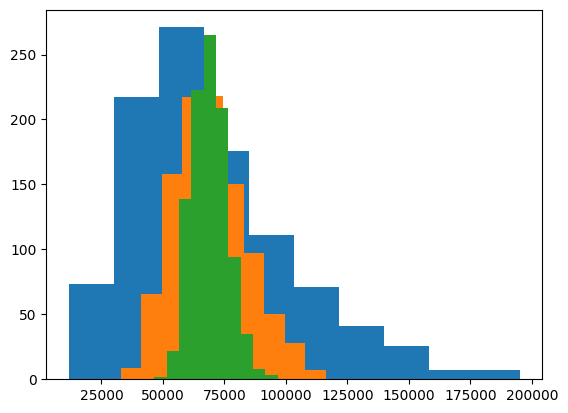

In [ ]:
# sample_infos=[(1,1000), (1000, 5), (1000,20)]
sample_infos=[(1000, 5), (1000,20)]
df=loan_df.copy()
plt.hist(loan_df.sample(1000)['x'])
for sample_info in sample_infos:
  sample_num, sample_size= sample_info[:]
  means=[]
  for i in range(sample_num):
    means.append(df.x.sample(sample_size).mean())

  plt.hist(means)

## **The Bootstrap**

One way to estimate the sampling distribution of a statistic is to use the bootstrap. This involves drawing additional samples, **with replacement**, from the sample itself and recalculating the statistic for each resample. This does not involve assumptions about the data or the sample statistic being normally distributed \
**Bootstrap sample**: sample taken with replacement from an observed data set \
**Resampling**: process of taking repeated samples from observed data; includes boostrap and permutation (shuffling) procedreus \
**bagging** (or **boostrap aggregating**): for multivariate data, where rows are samples as units

In [10]:
results=[]
for i in range(1000):
  sample = loan_df.x.sample(1000)
  results.append(sample.mean())
results = pd.Series(results)
print("Bootstrap Stats: ")
print(f"original: {loan_df.x.mean()}")
print(f"bias: {results.mean() - loan_df.x.mean()}")
print(f"std: {results.std()}")


Bootstrap Stats: 
original: 68760.51844
bias: 38.69412299999385
std: 1040.7864066018042


In [12]:
from scipy.stats import bootstrap
import numpy as np
#calculate 95% bootstrapped confidence interval for median
bootstrap_ci = bootstrap((loan_df.x,), np.median, confidence_level=0.95,
                         random_state=1, method='percentile')

#view 95% boostrapped confidence interval
print(bootstrap_ci.confidence_interval)


ConfidenceInterval(low=np.float64(61104.0), high=np.float64(62000.0))


## **Confidence Intervals**
 A 95% confidence interval does not mean there's a 95% chance the true parameter lies within the interval. Instead, it means that if we repeated the sampling process many times and calculated the confidence interval each time, about 95% of these intervals would contain the true parameter.\
The width of a confidence interval is influenced by several factors: sample size, variability in the data, and desired confidence level. A larger sample size or lower variability leads to narrower intervals, while a higher confidence level results in wider intervals.
  * The confidence level represents the percentage of confidence intervals that are expected to contain the statistic of interest. \
  * Interval endpoints are the top and bottom of the confidence interval.

In [20]:
import numpy as np
import scipy.stats as stats

# Sample data
data = loan_df.x

# Calculate sample mean and standard error
sample_mean = np.mean(data)
standard_error = stats.sem(data)

# Confidence level
confidence_level = 0.95

# Calculate confidence interval of mean
confidence_interval = stats.t.interval(confidence_level, len(data) - 1, loc=sample_mean, scale=standard_error)

print(f"Sample Mean: {sample_mean:.2f}")
print(f"{confidence_level*100:.0f}% Confidence Interval: {confidence_interval}")



Sample Mean: 68760.52
95% Confidence Interval: (np.float64(68472.38066526447), np.float64(69048.65621473553))


## **Normal Distribution**
  * Error: difference between a data point and predicted/average value
  * Standardize: subtract the mean and divide by standard deviation
  * z-score: result of standarizing an individual data point
  * **Standard normal**: normal distribution with mean =0 and standard deviation =1
  * QQ-Plot: plot to visualize how close a sample distribution is to a normal distribution. orders z-scores from low to high, and plt zscore on y axis, x axis is quantile of normal distribution



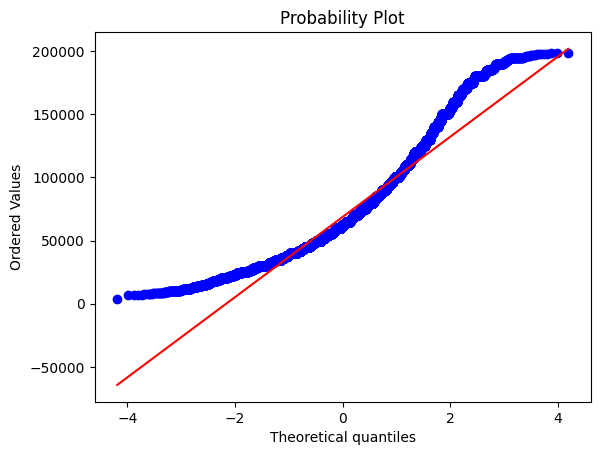

In [5]:
import scipy.stats as stats
stats.probplot(loan_df.x, dist="norm", plot=plt)
plt.show()

## **Long-Tailed Distributions**
*   Long-tailed distributions have a long, narrow portion where relatively extreme values occur at a low frequency.

*   Skew refers to where one tail of a distribution is longer than the other.

Most data is not normally distrbuted. Assuming normal distrbution can lead to underestimating extreme events

## Student's t-Distribution (t-distribution)

resembling normal distribution, but with thicker tails \
widely used as reference basis for distribution of sample means, differences bt two sample means, regression parameters

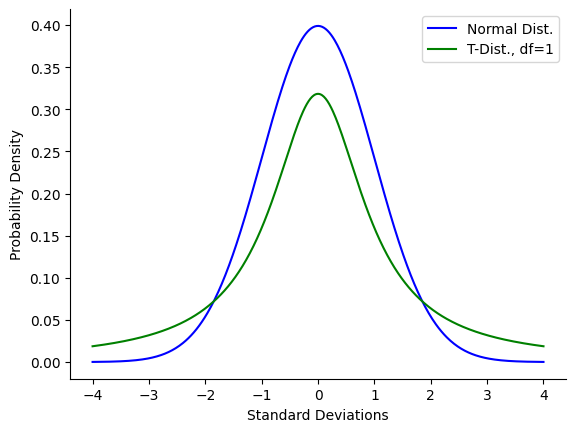

In [13]:
# Normal distribution
x = np.linspace(-4, 4, 500)
y = stats.norm.pdf(x)

# T distribution
df = 1
y_t = stats.t.pdf(x, df)

# Plotting
plt.ylabel('Probability Density')
plt.xlabel('Standard Deviations')
plt.plot(x, y, color='blue', label='Normal Dist.')
plt.plot(x, y_t, color='green', label=f'T-Dist., df={df}')
plt.legend()

# Styling - optional
sns.set_context('notebook')
sns.despine();

## Binomial Distribution

frequency distrubtion of the number of successes(x) in a given number of triAls (where each trial has only two possible outcomes)[link text](https://)(n) with specified probability(p) of success in each trial.

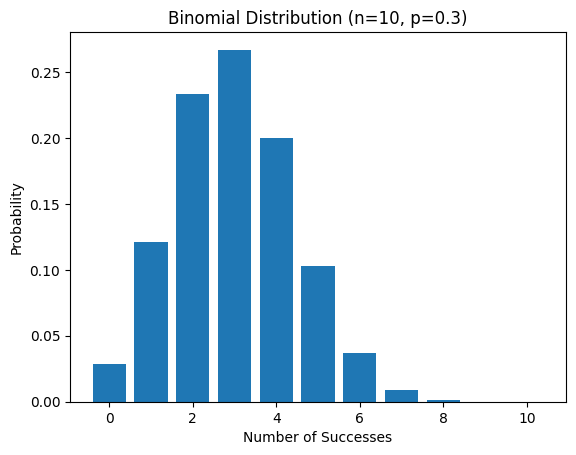

Probability of 5 or fewer successes: 0.9526510126000001
Random samples: [2 4 1 4 4 1 2 4 2 5 3 3 3 3 2 0 3 4 6 1 1 4 2 4 2 3 4 5 3 5 4 4 3 4 1 4 2
 5 4 3 4 1 0 2 2 2 2 3 1 2 6 3 5 5 4 3 2 4 4 5 4 3 3 2 3 2 5 4 5 6 2 2 1 3
 1 1 2 2 0 4 1 7 3 3 3 4 1 2 3 2 4 0 3 5 0 5 3 3 2 2]


In [6]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

# Parameters
n = 10  # Number of trials
p = 0.3 # Probability of success

# Calculate PMF for all possible outcomes
x = np.arange(0, n + 1)
pmf = binom.pmf(x, n, p)

# Plot PMF
plt.bar(x, pmf)
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.title(f'Binomial Distribution (n={n}, p={p})')
plt.show()

# Calculate CDF for 5 or fewer successes
cdf_5 = binom.cdf(5, n, p)
print(f"Probability of 5 or fewer successes: {cdf_5}")

# Generate random samples
samples = np.random.binomial(n, p, size=100)
print(f"Random samples: {samples}")

## **Poisson and Related Distributions**
addresses a clear question:\
*“How often is a specific event likely to happen over a given interval?”* \
The interval might represent time (hours, days), space (distance, area), volume, or any measurable parameter


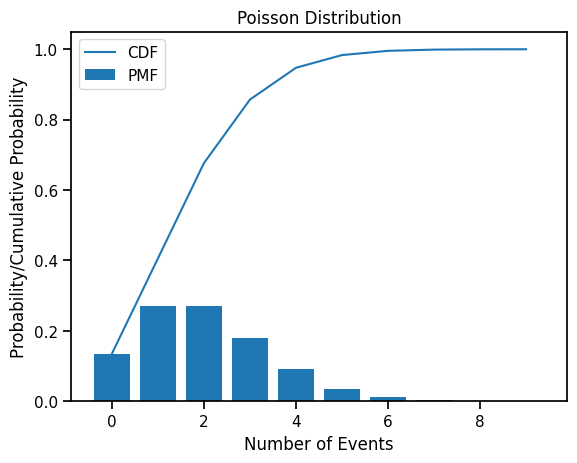

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Define the rate parameter (lambda)
mu = 2

# Probability Mass Function (PMF)
x = np.arange(0, 10)
pmf = poisson.pmf(x, mu)
plt.bar(x, pmf, label='PMF')

# Cumulative Distribution Function (CDF)
cdf = poisson.cdf(x, mu)
plt.plot(x, cdf, label='CDF')

# Generate random samples
samples = poisson.rvs(mu, size=1000)

plt.xlabel('Number of Events')
plt.ylabel('Probability/Cumulative Probability')
plt.title('Poisson Distribution')
plt.legend()
plt.show()